# HomeWork 9

**DeadLine : 23:59 19 Azar 1401**

**Total points : 100pts**


Import some prerequisites:

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

Run this cell for plotting.

In [ ]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 3

**Point : 35 pts**

## Erosion

In [119]:
def erosion(img , str_elem):
  c = signal.convolve2d(str_elem , img)

  height = img.shape[0] 
  width = img.shape[1] 

  return np.where(c>=5 , 1 , 0)[1:height + 1 , 1:width + 1]

In [120]:
# check erosion
str_elem = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
])

g = np.array([
    [0,1,0,0],
    [1,1,1,0],
    [0,1,0,0],
    [0,0,0,0]
])

erosion(g , str_elem)

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

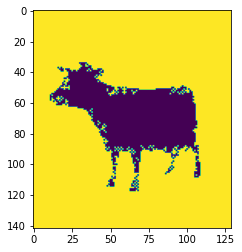

In [121]:
img  = cv2.imread("/content/img4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

str_elem = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
])

plt.imshow(erosion(img , str_elem))

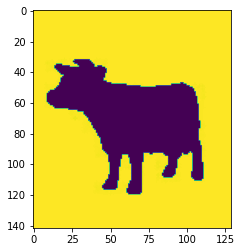

In [122]:
plt.imshow(cv2.erode(img ,str_elem.astype('uint8') , cv2.BORDER_CONSTANT, iterations=1))

## Dilation

In [49]:
def dilation(img , str_elem):
  c = signal.convolve2d(str_elem , img)

  height = img.shape[0] 
  width = img.shape[1] 

  return np.where(c>0 , 1 , 0)[1:height + 1 , 1:width + 1]

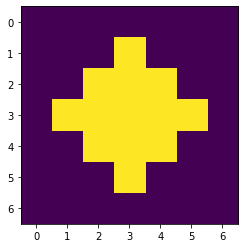

In [56]:
# check dilation
str_elem = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
])

g = np.array([
    [0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0],
    [0,0,1,1,1,0,0],
    [0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0],
])

plt.imshow(dilation(g , str_elem))

## Opening

In [60]:
def opening(img , str_elem):
  erode = erosion(img , str_elem)
  return dilation(erode , str_elem)

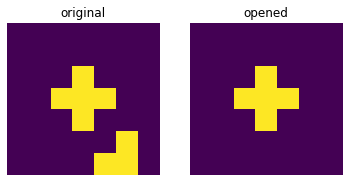

In [65]:
  # check opening
str_elem = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
])

g = np.array([
    [0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0],
    [0,0,1,1,1,0,0],
    [0,0,0,1,0,0,0],
    [0,0,0,0,0,1,0],
    [0,0,0,0,1,1,0],
])

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(g)
axarr[0].set_title("original")
axarr[0].axis('off')

axarr[1].imshow(opening(g , str_elem))
axarr[1].set_title("opened")
axarr[1].axis('off')

plt.show()

## Skeleton

In [57]:
def get_k(img , str_element):
  k = 1
  while erosion(image, str_element):
      k += 1
  return k

In [93]:
# Test get_K
img  = cv2.imread("/content/img4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img.shape

(142, 129)

In [104]:
openned = np.array([
    [0,0,1,0,0],
    [0,1,1,1,0],
    [0,1,0,1,0],
    [0,1,0,1,0],
    [0,0,0,0,0],
])

erode = np.array([
    [0,0,0,0,0],
    [0,1,1,1,0],
    [0,1,1,1,0],
    [0,1,0,1,0],
    [0,0,0,0,0],
])

a = erode - openned
np.where(a >=0 , a , 0)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

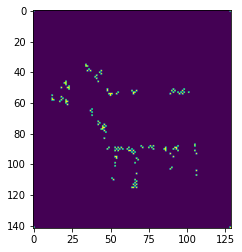

In [105]:
def find_skeleton(img):
  str_element = np.array([
      [0,1,0],
      [1,1,1],
      [0,1,0],
  ])

  # K = get_k(img , str_element)
  union = np.zeros_like(img)

  K = 10

  for i in range(K):
    erode = erosion(img,str_element)
    openned = opening(erode,str_element)
    a = erode - openned
    leftovers = np.where(a >=0 , a , 0)
    union = np.maximum(union, leftovers)

  return union

img  = cv2.imread("/content/img4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(find_skeleton(img))

Implement this function to get the input image and return the skeleton of the input image.

Test your implementation (don't change this cell).

In [ ]:
image_list = []

image1 = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_skeleton, params1 = get_skeleton(image1)
image_list.append([image1_skeleton, 'skeleton of image 1','img'])

image2 = cv2.imread('img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_skeleton, params2 = get_skeleton(image2)
image_list.append([image2_skeleton, 'skeleton of image 2','img'])

image3 = cv2.imread('img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_skeleton, params3 = get_skeleton(image3)
image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])

image4 = cv2.imread('img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_skeleton, params4 = get_skeleton(image4)
image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-a')

In [123]:
def get_skeleton(image):
    """
    Finds the skeleton of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The skeleton image.  
        numpy.ndarray: The parameters required for reconstructing image
    """
    
    res = image.copy()
    params = None
    
    #Write your code here
    
    
    return res, params

Implement this function to get the input image as skeleton and return the reconstruction of the skeleton.

In [ ]:
def recons_skeleton(image, params):
    """
    Finds the original image from the skeleton.
    
    Parameters:
        image (numpy.ndarray): The skeleton of image.
        params (numpy.ndarray): The parameters required for reconstructing image
    
    Returns:
        numpy.ndarray: The original image.  
    """
    
    res = image.copy()
    
    #Write your code here
    
    
    return res

Test your implementation (don't change this cell).

In [ ]:
image_list = []

image_list.append([image1_skeleton, 'skeleton of image 1', 'img'])
image_list.append([recons_skeleton(image1_skeleton, params1), 'image 1','img'])

image_list.append([image2_skeleton, 'skeleton of image 2', 'img'])
image_list.append([recons_skeleton(image2_skeleton, params2), 'image 2','img'])

image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])
image_list.append([recons_skeleton(image3_skeleton, params3), 'image 3', 'img'])

image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])
image_list.append([recons_skeleton(image4_skeleton, params4), 'image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-b')

# PART 4

**Point : 30 pts**

Here is for your helper functions(optional).

In [1]:
!pip install --upgrade imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


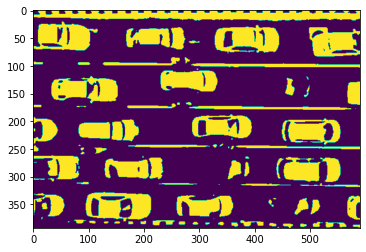

In [32]:
image = cv2.imread("/content/img5.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
thresh = cv2.threshold(blurred, 130, 255, cv2.THRESH_BINARY)[1]

plt.imshow(thresh)

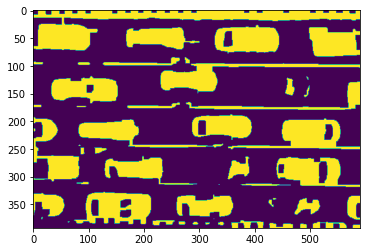

In [33]:
strc_elem = np.ones((9,9))

closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, strc_elem)
plt.imshow(closed)

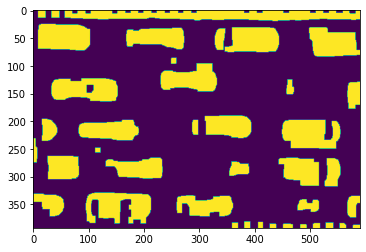

In [34]:
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, strc_elem)
plt.imshow(opened)

In [31]:
print( cv2.__version__)

4.6.0


In [35]:
import imutils

cnts = cv2.findContours(opened.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

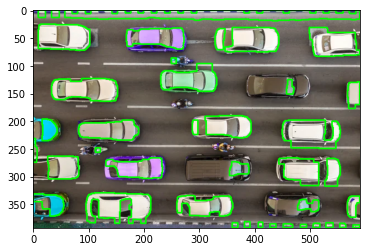

In [36]:
for c in cnts:
	# compute the center of the contour
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
	plt.imshow(image)

Implement this function to detect shapes and number of cars in an input image.

In [ ]:
def detect_car_num(image):
    '''
    Detects shapes and number of cars in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of cars
    '''
    
    result = image.copy()
    cars_num = None
    
    #Write your code here
    
    
    return result,cars_num

Test your implementation (don't change this cell).

In [ ]:
image_list = []
image = cv2.imread('img5.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_car_num(image)[0], 'cars detection', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4-a')

Implement this function to detect shapes and number of flowers in an input image.

In [ ]:
def detect_flower_num(image):
    '''
    Detects shapes and number of flowers in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of flowers
    '''
    
    result = image.copy()
    flowers_num = None
    
    #Write your code here
    
    
    return result,flowers_num

Test your implementation (don't change this cell).

In [ ]:
image_list = []
image = cv2.imread('img6.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_flower_num(image)[0], 'flowers detection', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4-b')

End!!!